In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Linear Regression (Baseline)

In [4]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))


Linear Regression MSE: 0.5558915986952441


Ridge Regression

In [5]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge MSE:", mean_squared_error(y_test, y_pred_ridge))


Ridge MSE: 0.5558034669932211


Lasso Regression

In [6]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso MSE:", mean_squared_error(y_test, y_pred_lasso))


Lasso MSE: 0.6135115198058131


Elastic Net

In [7]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
y_pred_elastic = elastic.predict(X_test)
print("Elastic Net MSE:", mean_squared_error(y_test, y_pred_elastic))


Elastic Net MSE: 0.5730994198028208


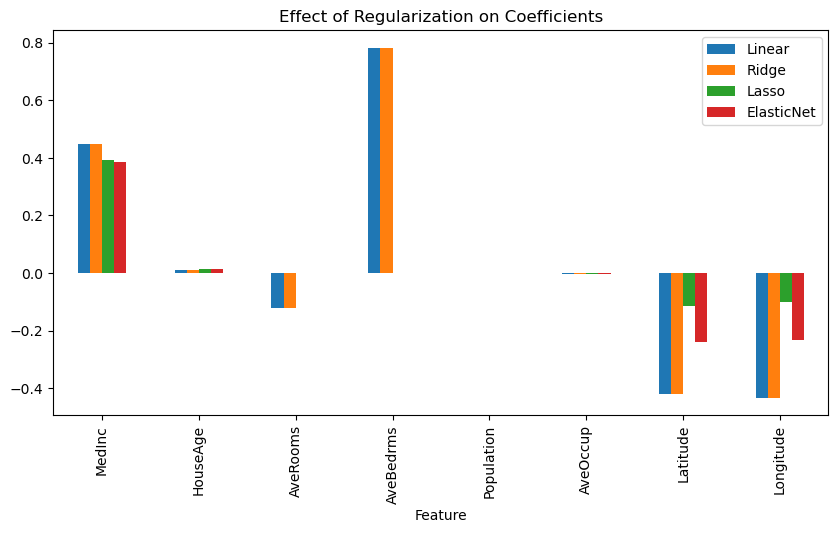

In [8]:
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'ElasticNet': elastic.coef_
})

coefs.set_index('Feature').plot(kind='bar', figsize=(10,5))
plt.title("Effect of Regularization on Coefficients")
plt.show()


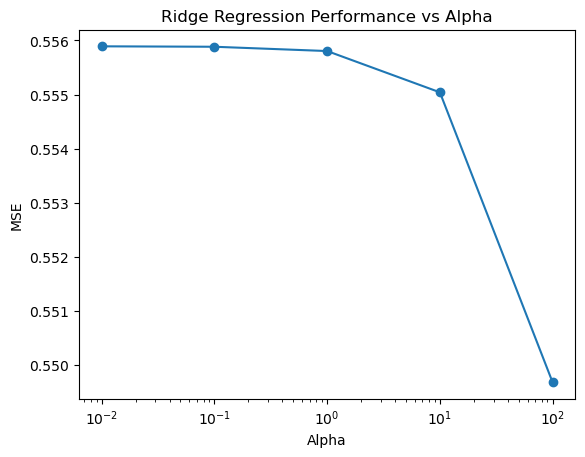

In [9]:
alphas = [0.01, 0.1, 1, 10, 100]
ridge_scores = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_scores.append(mean_squared_error(y_test, ridge.predict(X_test)))

plt.plot(alphas, ridge_scores, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Ridge Regression Performance vs Alpha')
plt.show()


In [10]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 10))
ridge_cv.fit(X_train, y_train)
print("Best alpha (Ridge):", ridge_cv.alpha_)


Best alpha (Ridge): 10.0
